# Libraries and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from scipy import stats

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

cmap1 = "Blues"

# Import and Explore
## 1. Know Your Data

In [2]:
train = pd.read_csv('train.csv')
train.shape
test = pd.read_csv('test.csv')
test.shape

(891, 12)

(418, 11)

I like to use .sample() instead of .head().  The first 10 rows are now always representative of the dataset as a whole.

In [3]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
744,745,1,3,"Stranden, Mr. Juho",male,31.00,0,0,STON/O 2. 3101288,7.9250,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.00,0,0,CA. 2314,7.5500,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.00,0,0,2699,18.7875,NaN,C
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


The average passenger age was 30 and the average fare was $32. I wonder how these columns are distributed?

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Most passengers were between the ages of 18 and 40. I'm surprised by how many infants were on board!

Text(0.5, 1.0, 'Age Distribution')

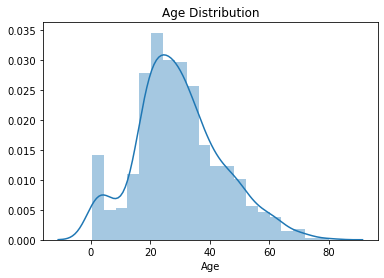

In [5]:
sns.distplot(train['Age']).set_title('Age Distribution')

I wonder why someone paid over $500 for their fare?

Text(0.5, 1.0, 'Fare Distribution')

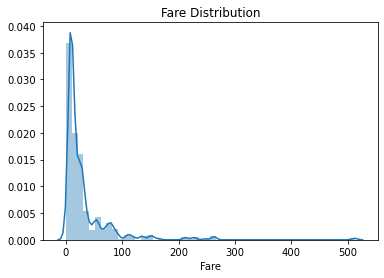

In [6]:
sns.distplot(train['Fare']).set_title('Fare Distribution')

It looks like we've got some NULL values in 'Age', 'Cabin', and 'Embarked'.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
cols = train.columns.tolist()
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
remove = ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']
cat_cols = cols
for ele in remove:
    cat_cols.remove(ele)
cat_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Pclass = Ticket Class<br>
SibSp = # of Siblings + Spouse on board<br>
Parch = # of Parents + Children on board<br>
Embarked = Embarkment Location

In [10]:
for col in cat_cols:
    train[col].value_counts()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Some passengers clearly took priority over others. Females, especially those of the middle and upper class, survived at a disproportionate rate.

Text(0.5, 1.0, 'Survival Rate by Sex and Economic Class')

Text(0, 0.5, 'Survival Rate')

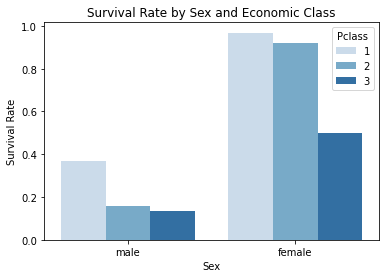

In [11]:
ax = sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train, ci=None, palette=cmap1)
ax.set_title('Survival Rate by Sex and Economic Class')
ax.set_ylabel('Survival Rate')

I want to group passengers by their age to see if age influenced survival.

In [12]:
train['AgeGrp'] = pd.cut(x=train['Age'], bins=[0, 17, 35, 60, 100], labels=['Child', 'YngAdult', 'OldAdult', 'Elderly'])

It looks like young passengers, particularly those under the age of 18, were prioritized. Note that economic class was still very important!

Text(0.5, 1.0, 'Survival Rate by Age and Economic Class')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Survival Rate')

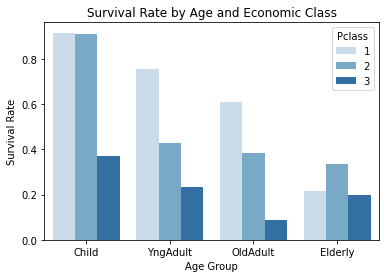

In [13]:
ax = sns.barplot(x='AgeGrp', y='Survived', hue='Pclass', data=train, ci=None, palette=cmap1)
ax.set_title('Survival Rate by Age and Economic Class')
ax.set_xlabel('Age Group')
ax.set_ylabel('Survival Rate')

I thought it would be nice to make a figure from these visualizations.

Text(0.5, 1.0, 'Survival Rate by Sex and Economic Class')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate by Age and Economic Class')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, '')

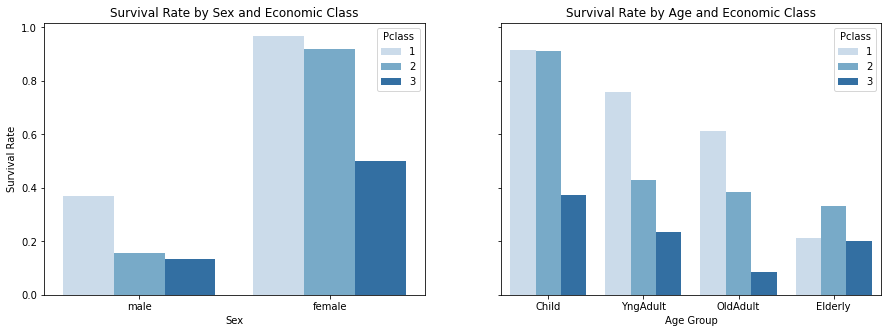

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train, ci=None, palette=cmap1, ax=ax1)
ax1.set_title('Survival Rate by Sex and Economic Class')
ax1.set_ylabel('Survival Rate')
sns.barplot(x='AgeGrp', y='Survived', hue='Pclass', data=train, ci=None, palette=cmap1, ax=ax2)
ax2.set_title('Survival Rate by Age and Economic Class')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('')

So far, several attributes seem relevant to passenger survival:
- Sex
- Age
- Economic Class

What about:
- Fare
- Cabin
- Embarkment Location

'Fare' was highly skewed, so I'm going to transform it before plotting it against 'Survived'.

In [16]:
train['FareTr'] = np.log1p(train['Fare'])

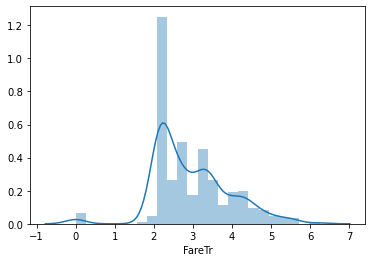

In [17]:
sns.distplot(train['FareTr'])

I was surprised to see that passenger fare had a relatively weak influence on survival.

Text(0.5, 1.0, 'Passenger Fare by Fate')

Text(0, 0.5, 'Fare (log(x+1))')

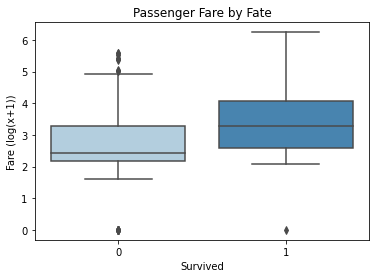

In [18]:
ax = sns.boxplot(x='Survived', y='FareTr', data=train, palette=cmap1)
ax.set_title('Passenger Fare by Fate')
ax.set_ylabel('Fare (log(x+1))')

For many passengers, cabin assignments are unknown. I will come back to this feature after the dataset has been cleaned.

In [23]:
print('Cabin, Percent NULL: {}'.format(train['Cabin'].isnull().sum()/len(train)*100))

Cabin, Percent NULL: 77.10437710437711


Most passengers embarked at Southampton (S). Only lower class passengers embarked at Queenstown (Q). Embarkment location does seem to influence survival, even when controlling for class. Did embarkment location influence cabin assignment or some other passenger attribute? Why would it influence survival?

In [64]:
embark_df = pd.pivot_table(train, values=['Survived', 'PassengerId'], index=['Embarked', 'Pclass'], 
                           aggfunc={'Survived': np.mean, 'PassengerId': pd.Series.nunique}, margins=True, margins_name='Total')
embark_df.reset_index(inplace=True)
embark_df.rename(columns={'Embarked':'Location', 'Pclass':'Class', 'PassengerId':'Count', 
                          'Survived':'% Survived'})

,Location,Class,Count,% Survived
0,C,1,85,0.694118
1,C,2,17,0.529412
2,C,3,66,0.378788
3,Q,1,2,0.500000
4,Q,2,3,0.666667
5,Q,3,72,0.375000
6,S,1,127,0.582677
7,S,2,164,0.463415
8,S,3,353,0.189802
9,Total,,889,0.382452


In [65]:
pd.pivot_table(train, values='Survived', index='Pclass', aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## 2. Clean Your Data